In [1]:
import cv2
import os
import re
import copy
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch


def mkt(num):
  c=np.ones((num,num))/num/num
  c=np.expand_dims(c,axis=(0,1))
  c=torch.Tensor(c)
  return c

def trans(input,layer,para,filp=False):
    if filp==True:
        input=255-input
    import torch
    import numpy as np
    layer.weight.data=para
    input1=np.expand_dims(input,axis=(0,1))
    input1=torch.Tensor(input1)
    input1=layer(input1)
    input1=input1.detach().numpy().squeeze(0).squeeze(0)
    _, output = cv2.threshold(input1, 127, 255, 0)
    #output=255-input
    return output

def trans2(input,layer,para,filp=False):
    if filp==True:
        input=255-input
    import torch
    import numpy as np
    layer.weight.data=para
    input1=np.expand_dims(input,axis=(0,1))
    input1=torch.Tensor(input1)
    input1=layer(input1)
    input1=input1.detach().numpy().squeeze(0).squeeze(0)
    return input
    

def mkdir(path):
    import os
    a=os.listdir(path)
    dir=[]
    for i in a:
        path1=path+'/'+i
        a1=os.listdir(path1)
        for j in a1:
            path2=path1+'/'+j
            a2=os.listdir(path2)
            for k in a2:
                path3=path2+'/'+k
                a3=os.listdir(path3)
                for l in a3:
                    path4=path3+'/'+l
                    a4=os.listdir(path4)
                    for n in a4:
                        path5=path4+'/'+n
                        a5=os.listdir(path5)
                        for m in a5:
                            if m=='Diff':
                                continue
                            path6=path5+'/'+m
                            a6=os.listdir(path6)
                            for v in a6:
                                path7=path6+'/'+v
                                if 'Depth_Diff_Cal' in path7:
                                    dir.append(path7)
    return dir


layer29=torch.nn.Conv2d(1,1,29,padding=14)
layer27=torch.nn.Conv2d(1,1,27,padding=13)
layer25=torch.nn.Conv2d(1,1,25,padding=12)
layer23=torch.nn.Conv2d(1,1,23,padding=11)
layer21=torch.nn.Conv2d(1,1,21,padding=10)
layer19=torch.nn.Conv2d(1,1,19,padding=9)
layer17=torch.nn.Conv2d(1,1,17,padding=8)
layer15=torch.nn.Conv2d(1,1,15,padding=7)
layer13=torch.nn.Conv2d(1,1,13,padding=6)
layer11=torch.nn.Conv2d(1,1,11,padding=5)
layer9=torch.nn.Conv2d(1,1,9,padding=4)
layer7=torch.nn.Conv2d(1,1,7,padding=3)
layer5=torch.nn.Conv2d(1,1,5,padding=2)
layer3=torch.nn.Conv2d(1,1,3,padding=1)

para29=torch.nn.Parameter(mkt(29))
para27=torch.nn.Parameter(mkt(27))
para25=torch.nn.Parameter(mkt(25))
para23=torch.nn.Parameter(mkt(23))
para21=torch.nn.Parameter(mkt(21))
para19=torch.nn.Parameter(mkt(19))
para17=torch.nn.Parameter(mkt(17))
para15=torch.nn.Parameter(mkt(15))
para13=torch.nn.Parameter(mkt(13))
para11=torch.nn.Parameter(mkt(11))
para9=torch.nn.Parameter(mkt(9))
para7=torch.nn.Parameter(mkt(7))
para5=torch.nn.Parameter(mkt(5))
para3=torch.nn.Parameter(mkt(3))


/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def crop2(path,sq=0,rr=0.095,sh=True):

    def rac(i1):
        return (i1[3]-i1[1])*(i1[2]-i1[0])

    def com(i1,i2):
        r=min(i1[2],i2[2])
        l=max(i1[0],i2[0])
        u=max(i1[1],i2[1])
        d=min(i1[3],i2[3])
        if (d-u<=0) or (r-l<=0):
            return 0
        else:
            a=[l,u,r,d]
            return rac(a)

    def pic(i1,i2):
        sum=rac(i1)+rac(i2)-com(i1,i2)
        return com(i1,i2)/sum
    


    #'/ai_scanner_DB/DB/db_diff/0031/TRAY1/BR/TP1/TO000/DiffByCal/V0_0_1_123622270639_R2_FOV090_ANG20_MIL500_LI3_TRAY1_BR_LY_TP1_TO000_0031_20221019_110138_Depth_Diff_Cal.png'
    f=cv2.imread(path)
    f=cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

    f8=copy.deepcopy(f)
    

    if sh==True:
        plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
        plt.show()

    p = re.search('DiffByCal',path)
    
    
    path1=path[p.start()+10:]

    path3=path[:p.start()]
    path3=path3+'Diff/'+re.sub('_Cal','',path1)

    path2=path1.split('_')
    path2=path2[4:]
    path2=path2[4]+'/'+path2[10]+'/'+path2[5]+'/'+path2[6]+'/'+path2[8]+'/'+path2[9]+'/'+path1
    path2='/ai_scanner_DB/DB/V0_0_1/'+re.sub('Depth_Diff_Cal.png','GT.csv',path2) #/ai_scanner_DB/DB/V0_0_1/LI3

    
    
    f4=cv2.imread(path3)
    f4=cv2.cvtColor(f4, cv2.COLOR_BGR2GRAY)
    f5=copy.deepcopy(f4)
    


    csv=pd.read_csv(path2)
    csv=csv.iloc[0,1:5]
    csv=np.asarray(csv/2)
    csv=csv.astype(int)


    f1=f[csv[1]:csv[3],csv[0]:csv[2]]
    f11=copy.deepcopy(f)

    
    d1, _ = cv2.threshold(f, 0, 255, cv2.THRESH_OTSU)  # _, f = cv2.threshold(f, 40, 255, cv2.THRESH_BINARY)
    _, f = cv2.threshold(f, d1*1.4, 255, cv2.THRESH_BINARY)
    
    f2=copy.deepcopy(f)


    if sh==True:
        plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
        plt.show()
        
    f=trans(f,layer11,para11) # f=trans(f,layer25,para25)

    if sh==True:
        plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
        plt.show()

    f=f.astype(np.uint8)
    _,contour,_ = cv2.findContours(f, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    conmax=0

    roun = np.empty((0,4), int)

    if len(contour)<1:
        d1, f4 = cv2.threshold(f4, 25, 255, cv2.THRESH_OTSU)
        f4=trans(f4,layer11,para11)
        f4=f4.astype(np.uint8)
        _,contour,_ = cv2.findContours(f4, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        conmax=0

    
    
    for i in contour:
        rotateRect = cv2.minAreaRect(i)
        r1,r2=rotateRect[1]
        
        if r1*r2>conmax:
            conmax=r1*r2
            true_rotateRect=rotateRect
    



    vertex = cv2.boxPoints(true_rotateRect)


    if len(contour)>1 and conmax<2550:
        low1=np.floor(vertex)[:,0].astype(int)
        low2=np.floor(vertex)[:,1].astype(int)
        l1max=abs(int(max(low1)))
        l1min=abs(int(min(low1)))
        l2max=abs(int(max(low2)))
        l2min=abs(int(min(low2)))

        
        a11=[l1min,l2min,l1max,l2max]
        ff=f[l2min:l2max,l1min:l1max]
        f5d, _ = cv2.threshold(f5, 0, 255, cv2.THRESH_OTSU)
        
        f7=copy.deepcopy(f5)
        f7[:,:]=0
        
        f7[l2min:l2max,l1min:l1max]=ff/255*f5d*2

        
        f5[:300,490:520]=0
        f5[55:300,155:175]=0
        f5[305:325,160:460]=0

        f5=(f5+f7)/2
        f5=f5.astype(np.uint8)

        

        f9=copy.deepcopy(f5)


        d1, _ = cv2.threshold(f5, 0, 255, cv2.THRESH_OTSU)  # _, f = cv2.threshold(f, 40, 255, cv2.THRESH_BINARY)
        


        f2=copy.deepcopy(f)

        if sh==True:
            plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
            plt.show()

        f5=f5.astype(np.uint8)
        _,contour,_ = cv2.findContours(f5, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        conmax=0

        d2=d1*rr

    

        le=len(contour)

        if sh==True:
            
            plt.imshow(cv2.cvtColor(f5, cv2.COLOR_GRAY2BGR))
            plt.show()
        
        for i in range(15):
            
            conmax=0
            roun=[]
            f3=copy.deepcopy(f5)
            
            d1+=d2 # d1=d1*1.085
            _, f3 = cv2.threshold(f3, d1, 255, cv2.THRESH_BINARY)
            _,contour1,_ = cv2.findContours(f3, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
            f3=trans(f3,layer3,para3)
            f3=trans(f3,layer21,para21)
            f3=f3.astype(np.uint8)
            _,contour,_ = cv2.findContours(f3, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
            
            
            


            if len(contour)==0:
                d1=d1-d2
                f3=copy.deepcopy(f5)
                _, f3 = cv2.threshold(f3, d1, 255, cv2.THRESH_BINARY)
                _,contour1,_ = cv2.findContours(f3, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
                f3=trans(f3,layer19,para19)
                f3=f3.astype(np.uint8)
                _,contour,_ = cv2.findContours(f3, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
                for i in contour:
                    rotateRect = cv2.minAreaRect(i)
                    r1,r2=rotateRect[1]
                    roun.append(r1*r2)
                    if r1*r2>conmax:
                        conmax=r1*r2
                        true_rotateRect=rotateRect
                        vertex = cv2.boxPoints(true_rotateRect)
                break

            for i in contour:
                rotateRect = cv2.minAreaRect(i)
                r1,r2=rotateRect[1]
                roun.append(cv2.contourArea(i))
                if cv2.contourArea(i)>conmax:
                    #r1*r2>conmax conmax=r1*r2
                    conmax=cv2.contourArea(i)
                    true_rotateRect=rotateRect
                    vertex = cv2.boxPoints(true_rotateRect)
            roun=np.array(roun)
            roun.sort()

            
            if roun[-1]>=roun[:-1].sum() and len(contour)<9:
                
                if sh==True:
                    
                    plt.imshow(cv2.cvtColor(f3, cv2.COLOR_GRAY2BGR))
                    plt.show()
                break
            else:
                continue
    
    
    elif conmax<1000:

        d1, f5 = cv2.threshold(f5, 0, 255, cv2.THRESH_OTSU)
        f2=copy.deepcopy(f)

        if sh==True:
            plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
            plt.show()

        f5=f5.astype(np.uint8)
        _,contour,_ = cv2.findContours(f5, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        conmax=0

        d2=d1*rr

        le=len(contour)

        if sh==True:
            
            plt.imshow(cv2.cvtColor(f5, cv2.COLOR_GRAY2BGR))
            plt.show()
        
        for i in range(15):
            
            conmax=0
            roun=[]
            f3=copy.deepcopy(f5)
            
            d1+=d2 # d1=d1*1.085
            _, f3 = cv2.threshold(f3, d1, 255, cv2.THRESH_BINARY)
            _,contour1,_ = cv2.findContours(f3, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
            f3=trans(f3,layer3,para3)
            f3=trans(f3,layer21,para21)
            f3=f3.astype(np.uint8)
            _,contour,_ = cv2.findContours(f3, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
            
            for i in contour:
                rotateRect = cv2.minAreaRect(i)
                r1,r2=rotateRect[1]
                roun.append(cv2.contourArea(i))
                if cv2.contourArea(i)>conmax:
                    
                    conmax=cv2.contourArea(i)
                    true_rotateRect=rotateRect
                    vertex = cv2.boxPoints(true_rotateRect)
            roun=np.array(roun)
            roun.sort()

            
            if roun[-1]>=roun[:-1].sum() and len(contour)<9:
                
                if sh==True:
                    
                    plt.imshow(cv2.cvtColor(f3, cv2.COLOR_GRAY2BGR))
                    plt.show()
                break
            else:
                continue

        







    else:
        f2=copy.deepcopy(f)

        if sh==True:
            plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
            plt.show()
            
        f=trans(f,layer11,para11) # f=trans(f,layer25,para25)

        if sh==True:
            plt.imshow(cv2.cvtColor(f, cv2.COLOR_GRAY2BGR))
            plt.show()

        f=f.astype(np.uint8)
        _,contour,_ = cv2.findContours(f, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        conmax=0


        for i in contour:
            rotateRect = cv2.minAreaRect(i)
            r1,r2=rotateRect[1]
            #roun.append(r1*r2)
            if r1*r2>conmax:
                conmax=r1*r2
                true_rotateRect=rotateRect

        vertex = cv2.boxPoints(true_rotateRect)



    b1=pd.read_csv(path2)
    b1=b1.iloc[0,1:5]
    b1=np.asarray(b1)

    low1=2*np.floor(vertex)[:,0].astype(int)
    low2=2*np.floor(vertex)[:,1].astype(int)
    l1max=abs(int(max(low1)*(1+sq)))
    l1min=abs(int(min(low1)*(1-sq)))
    l2max=abs(int(max(low2)*(1+sq)))
    l2min=abs(int(min(low2)*(1-sq)))
    a1=[l1min,l2min,l1max,l2max]
    a,b=(l1min,l2min),(l1max,l2max)
    c,d=(b1[0],b1[1]),(b1[2],b1[3])

    



    pathc=re.sub('_GT.csv','_Color.png',path2)
    img=cv2.imread(pathc)

    if sh==True:
        cv2.rectangle(img, c, d, (255,0,0), 3)
        cv2.rectangle(img, a, b, (0,255,0), 3)
        plt.figsize=(1,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

        
    return [pic(a1,b1),a1,pathc]


In [4]:
def mkdir_l2(path):
    import os
    a=os.listdir(path)
    dir=[]
    for i in a:
        path1=path+'/'+i
        a1=os.listdir(path1)
        for j in a1:
            path2=path1+'/'+j
            a2=os.listdir(path2)
            for k in a2:
                path3=path2+'/'+k
                a3=os.listdir(path3)
                for l in a3:
                    path4=path3+'/'+l
                    a4=os.listdir(path4)
                    for n in a4:
                        path5=path4+'/'+n
                        a5=os.listdir(path5)
                        for m in a5:
                            if m=='Diff':
                                continue
                            path6=path5+'/'+m
                            a6=os.listdir(path6)
                            for v in a6:
                                path7=path6+'/'+v
                                if ('Depth_Diff_Cal' in path7 and 'L2' in path7):
                                    dir.append(path7)
    return dir

In [5]:
p=mkdir_l2('/ai_scanner_DB/DB/db_diff')

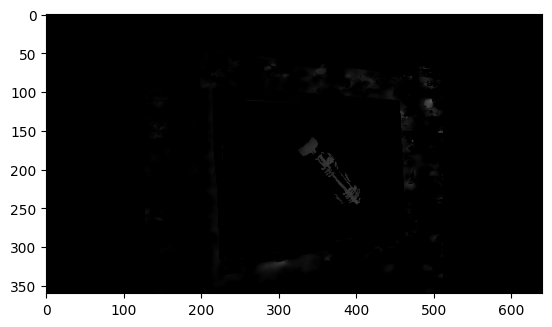

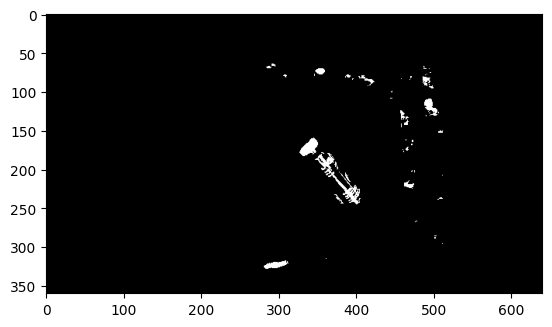

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


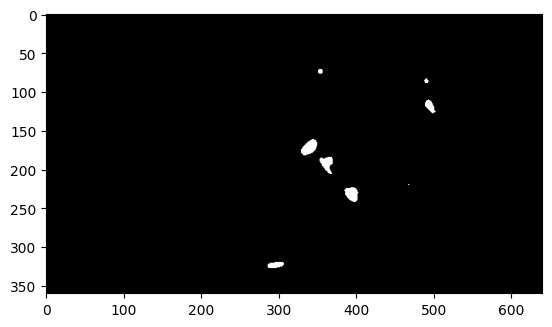

2222222


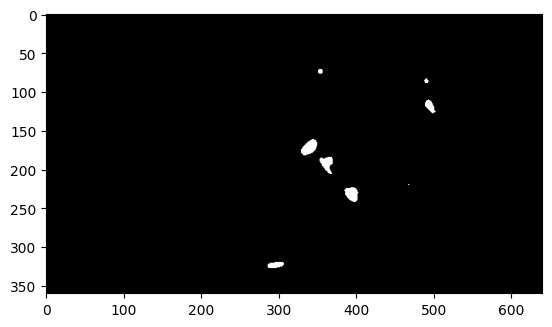

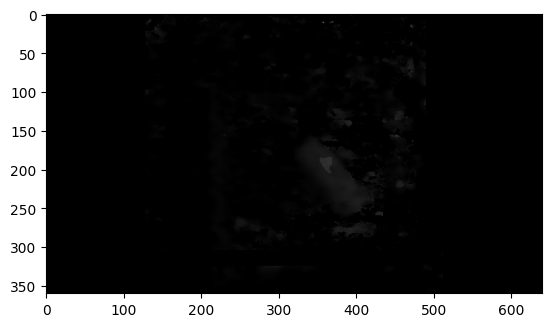

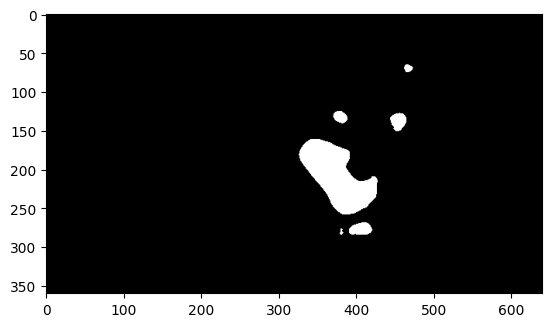

[0.6749953499907,
 [622, 286, 876, 540],
 '/ai_scanner_DB/DB/V0_0_1/LI3/1063/TRAY1/DR/TP5/FR315/V0_0_1_126122270991_L2_FOV090_ANG20_MIL500_LI3_TRAY1_DR_LY_TP5_FR315_1063_20221126_174819_Color.png']

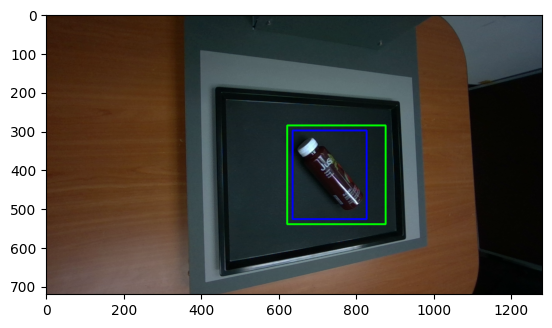

In [14]:
crop2(p[73],0,0.11,True)